In [1]:
import rastereasy

# Computing NDVI and identifying baresoils

## 1) Read and visualize image

- Size of the image:
   - Rows (height): 903
   - Cols (width): 867
   - Bands: 12
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (48.30106114, -3.78200251)
- Driver: GTiff
- Data type: int16
- Projection system: EPSG:32630
- Nodata: -32768.0

- Given names for spectral bands: 
   {'1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, '11': 11, '12': 12}




<Figure size 640x480 with 0 Axes>

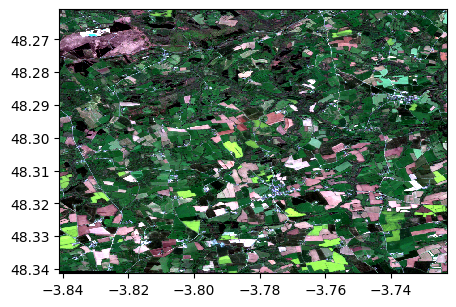

In [2]:
# Read image
im1=rastereasy.Geoimage('./data/demo/sentinel_crops.tif')
im1.info()
im1.colorcomp(['4','3','2'])

## 2) Get red and nir bands

In [3]:
r=im1.select_bands('4')
nir=im1.select_bands('8')


## 3) Compute ndvi

In [4]:
# Add an epsilon to prevent from dividing by zero
epsilon=1e-7
ndvi=(nir-r)/(nir+r+epsilon)


## 4) Visualize

- Size of the image:
   - Rows (height): 903
   - Cols (width): 867
   - Bands: 1
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (48.30106114, -3.78200251)
- Driver: GTiff
- Data type: float64
- Projection system: EPSG:32630
- Nodata: nan

- Given names for spectral bands: 
   {'ndvi': 1}




<Figure size 640x480 with 0 Axes>

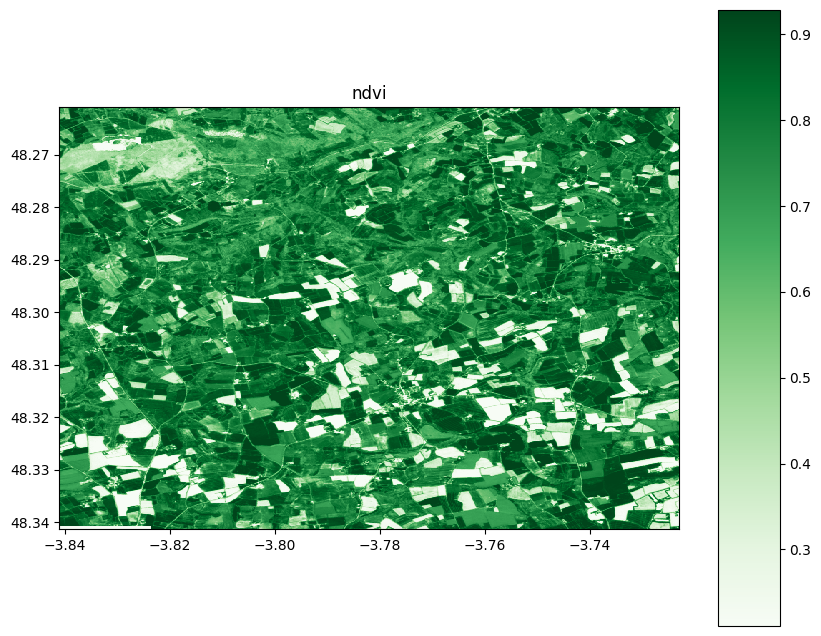

<Figure size 640x480 with 0 Axes>

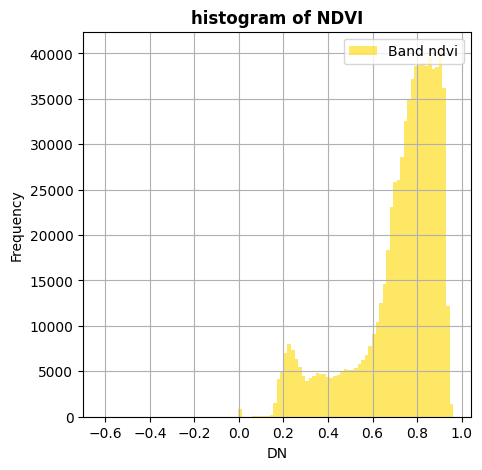

In [5]:
# Change the name of the band dor consistency
ndvi.change_names({'ndvi':1})
ndvi.info()
ndvi.visu(cmap='Greens',colorbar=True,title='ndvi',fig_size=(10,10))
ndvi.hist(title='histogram of NDVI')

# save ndvi
ndvi.save('./data/results/NDVI/ndvi.tif')

# 2) Identifying bare soils

### 1) With a threshold on NDVI

- Size of the image:
   - Rows (height): 903
   - Cols (width): 867
   - Bands: 1
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (48.30106114, -3.78200251)
- Driver: GTiff
- Data type: bool
- Projection system: EPSG:32630
- Nodata: 0

- Given names for spectral bands: 
   {'ndvi': 1}




<Figure size 640x480 with 0 Axes>

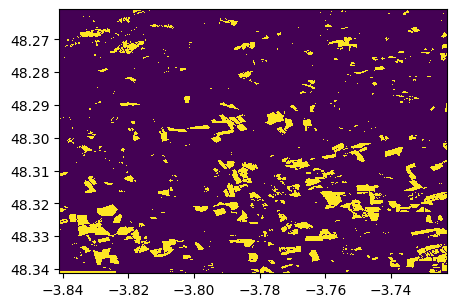

In [6]:
threshold=0.4
baresoil=ndvi<=threshold
baresoil.info()
baresoil.visu()


### 2) With ndvi.where() (similar than with numpy)

- Size of the image:
   - Rows (height): 903
   - Cols (width): 867
   - Bands: 1
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (48.30106114, -3.78200251)
- Driver: GTiff
- Data type: float64
- Projection system: EPSG:32630
- Nodata: nan

- Given names for spectral bands: 
   {'ndvi': 1}


- Size of the image:
   - Rows (height): 903
   - Cols (width): 867
   - Bands: 1
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (48.30106114, -3.78200251)
- Driver: GTiff
- Data type: float64
- Projection system: EPSG:32630
- Nodata: nan

- Given names for spectral bands: 
   {'ndvi': 1}




<Figure size 640x480 with 0 Axes>

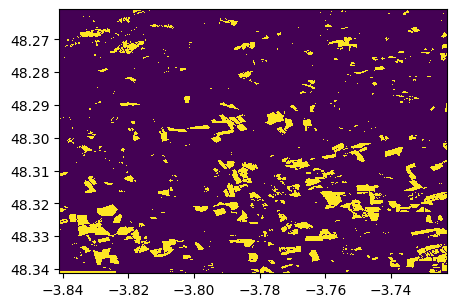

 diff of the two baresoils 0


In [7]:
ndvi.info()
baresoil2=ndvi.where(ndvi<=threshold,1,0)
baresoil2.info()
baresoil2.visu()
# check that this is identical
print(' diff of the two baresoils', (baresoil2==baresoil).sum()-baresoil.shape[0]*baresoil.shape[1])

### 3) With indexing

- Size of the image:
   - Rows (height): 903
   - Cols (width): 867
   - Bands: 1
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (48.30106114, -3.78200251)
- Driver: GTiff
- Data type: float64
- Projection system: EPSG:32630
- Nodata: nan

- Given names for spectral bands: 
   {'ndvi': 1}




<Figure size 640x480 with 0 Axes>

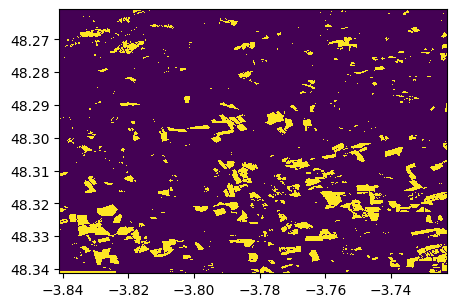

 diff of the two baresoils 0


In [8]:
baresoil3=ndvi*0
baresoil3[ndvi<=threshold]=1
baresoil3[ndvi>threshold]=0
baresoil3.info()
baresoil3.visu()
print(' diff of the two baresoils',(baresoil3==baresoil2).sum()-baresoil3.shape[0]*baresoil3.shape[1])
